# Necessary Imports

In [ ]:
from numpy.random import random_sample
from math import exp
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Perceptron Class
The Perceptron class has following methods:
1. constructor method(*length_of_inputs, activation_function*)
> Allowed activation functions - [*'step','sigmoid','tanh'*]
2. weight_adjustment(*input_vector,error*)
3. result(*input_vector*)
4. recall(*input_vector*)

In [ ]:
class Perceptron(object):
    def __init__(self,no_of_inputs,activation):
        self.w = random_sample(no_of_inputs+1)
        self.lr = 0.001
        self.bias = float(1)
        self.activation = activation


    def weight_adjustument(self,inputs,error):
        for x in range(len(inputs)):
            self.w[x] += self.lr*inputs[x]*error

        self.w[-1] += self.lr*self.bias*error

    def result(self,inputs):
        value=0
        for x in range(len(inputs)):
            value += self.w[x]*inputs[x]

        value += self.w[-1]*self.bias

        if self.activation == 'step':
            if value >= 0 :                                                 # step/thresolding function   
                return 1 
            return 0   

        elif self.activation == 'sigmoid':
            return round(float(1/(1+exp(-value))))                         # sigmoid activation

        elif self.activation == 'tanh':
            tanh =  float((exp(value)-exp(-value)/(exp(value)+exp(-value))))    # with tanh activation function
            if tanh > 0:
                return 1
            return 0                                                            # end of tanh


        #return float(exp(value)/sum[exp(value)])                       # softmax activation
        



    def recall(self,inputs):
        res = self.result(inputs)
        if res > 0:
            return 1
        return 0
        #return res

    

# Dataset Preperation
Please specify no of features to be considered out of 4 features.

In [ ]:
data = load_iris()
features = data.data.tolist()
total_features = len(features[0])       # no_of_features = 4
no_of_features_to_consider = total_features    # subtract 1 from total_features to consider only three features for training
for i in range(total_features-no_of_features_to_consider):
    for feature in features:
        del feature[-1]
targets = data.target.tolist()
norm_features = normalize(features)

In [ ]:
d = {x:targets.count(x) for x in set(targets)}          # counting of each target , all are in equal numbers 
d

{0: 50, 1: 50, 2: 50}

In [ ]:
X_train, X_test, y_train, y_test = train_data = train_test_split(norm_features[:100],targets[:100],test_size=0.3,stratify=targets[:100])   # split the data into train and test

#Training
**Do not forget to pass the activation function argument** ----- Task1

In [ ]:
p = Perceptron(len(features[0])+1,'tanh')   # two arguments needed 1) No of inputs 2) Activation function (['step','sigmoid','tanh'])

In [ ]:
epoch = 0
errors =[]
total_epochs = 200
while(epoch < total_epochs):

    error = 0
    
    for i in range(len(X_train)):
        output = p.result(X_train[i])
                          
        iter_error = y_train[i]-output

        error += iter_error

        p.weight_adjustument(X_train[i],iter_error)

    mse = float((error**2)/2)
    errors.append(abs(error))
    

    epoch += 1

    if epoch % 10 == 0:
        #print("The MSE of %d epoch is %.1f"%(epoch,mse))
        #print("The MSE of %d epoch is %.1f"%(epoch,error))
        pass
        if epoch % 1000 ==0:
            #print("0 : %.1f     1 : %.1f    2 : %.1f    3 : %.1f"%(p.w[0],p.w[1],p.w[2],p.w[3]))
            pass

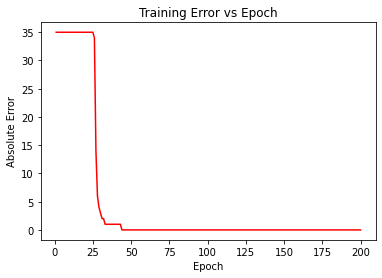

In [ ]:
plt.plot(list(range(1,total_epochs+1)),errors,'r')
plt.xlabel('Epoch')
plt.ylabel('Absolute Error')
plt.title("Training Error vs Epoch")
plt.savefig('train_error_tanh.png')

In [ ]:
preds =[p.recall(val) for val in X_test]
print("True Value  | Pred Value")
errors = 0
for true,pred in zip(y_test,preds):
    print("%d           |      %d"%(true,pred))
    if true != pred:
        errors += 1

print("Accuracy : ",(1-errors/len(y_test))*100)

True Value  | Pred Value
1           |      0
1           |      0
1           |      0
0           |      0
0           |      0
0           |      0
1           |      0
1           |      0
0           |      0
1           |      0
0           |      0
0           |      0
0           |      0
1           |      0
0           |      0
0           |      0
1           |      0
1           |      0
1           |      0
1           |      0
0           |      0
0           |      0
0           |      0
0           |      0
0           |      0
1           |      0
1           |      0
1           |      0
0           |      0
1           |      0
Accuracy :  50.0
